In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score ,f1_score
from sklearn.metrics import RocCurveDisplay


In [63]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [64]:
# Split into x and y
x = df.drop("target",axis=1)

y = df["target"]

In [66]:
# Put models in dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}

def fit_and_score (models, x_train , x_test , y_train , y_test):
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary
    model_scores = {}
    # Loop through models
    for name, models in models.items():
        # Fir the model to the data
        model.fit (x_train,y_train)
        # Evaluate the model and append itsscore to model_score
        model_scores[name] = model.score(x_test,y_test)
        
    return model_scores

In [67]:
model_scores = fit_and_score(models = models,
                             x_train =x_train,
                             x_test =x_test,
                             y_train = y_train,
                             y_test = y_test )
model_scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.8524590163934426,
 'Random Forest': 0.8524590163934426}

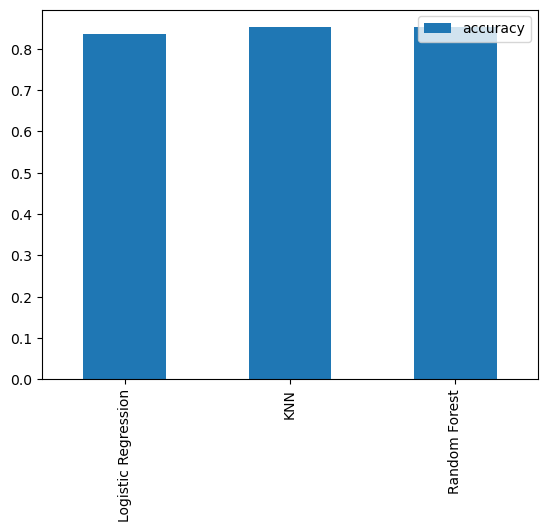

In [68]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [69]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fit the algo 
    knn.fit(x_train,y_train)
    
    # Update the training score list 
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the best score list
    test_scores.append(knn.score(x_test,y_test))

In [70]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [71]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the data test data: 75.41%


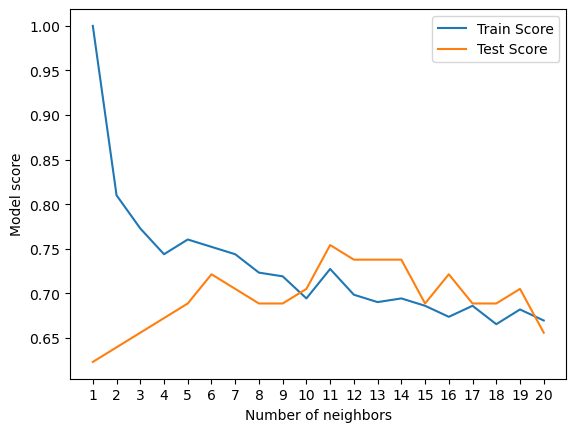

In [72]:
plt.plot(neighbors,train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the data test data: { max(test_scores)*100:.2f}%")

In [73]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV( LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv = 5 ,
                               n_iter=20 ,
                               verbose=True )




In [74]:
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [76]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

# Plot ROC curve and calculate and calciate ACU metric

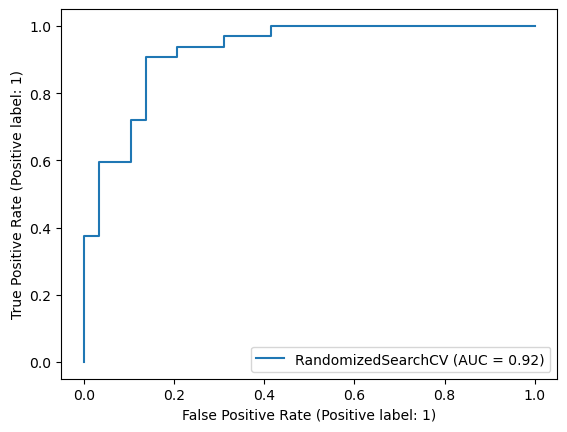

In [82]:
RocCurveDisplay.from_estimator(rs_log_reg, x_test, y_test);

In [86]:
# Make preidctions on test data
y_preds = rs_log_reg.predict(x_test)


# confusion Matrix
print(confusion_matrix(y_test,y_preds)) 

[[25  4]
 [ 3 29]]


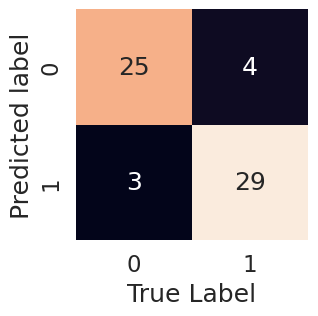

In [91]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig , ax  = plt.subplots(figsize = (3,3))
    ax =sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# calculate evaluation metrics using cross-validation


In [94]:
# Check best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [97]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.23357214690901212,
                        solver = "liblinear")

# Cross-validated accuracy
cv_acc = cross_val_score (clf,
                         x, y , cv = 5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [98]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [102]:
# Cross-validation precision
cv_precision = cross_val_score(clf,
                              x,y,cv = 5,
                              scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [103]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [104]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                              x,y,cv = 5,
                              scoring="recall")
cv_recall

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [105]:
# Cross-validation f1
cv_f1 = cross_val_score(clf,
                              x,y,cv = 5,
                              scoring="f1")
cv_f1

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'cross-validated metrics'}>

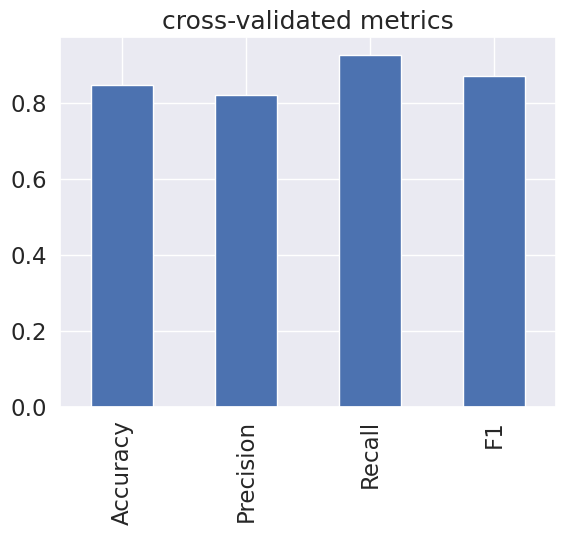

In [110]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({ "Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                           "F1" : cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = "cross-validated metrics",
                     legend = False)

# Feature importance

In [112]:
rs_log_reg.best_params_

clf = LogisticRegression(C = 0.23357214690901212,
                        solver="liblinear")

clf.fit(x_train,y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [113]:
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [114]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

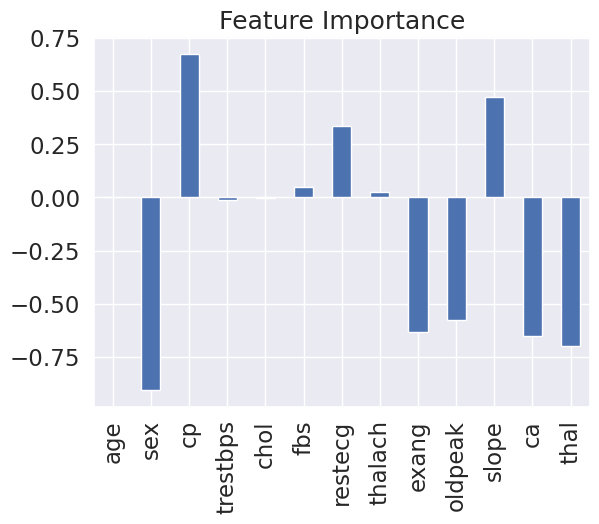

In [117]:
# Visualize  feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title = "Feature Importance",
                     legend = False);

In [120]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
